In [111]:
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import hvplot.pandas
%matplotlib inline
import plotly.express as px

In [82]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [83]:
# E-Sport Stock Tickers
ticker = ["EA", "ATVI", "TTWO"]

# Timeframe
timeframe = "1D"

# COVID year stock performance
start_date = pd.Timestamp("2020-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
Esport_ticker = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

ATVI                                         EA  \
                            open     high      low  close    volume    open   
time                                                                          
2020-05-26 00:00:00-04:00  73.37  73.4888  69.6100  70.00   9221890  120.44   
2020-05-27 00:00:00-04:00  69.29  70.3400  66.5920  70.15  11197555  115.07   
2020-05-28 00:00:00-04:00  70.00  71.7300  69.4006  70.17   7130217  117.99   
2020-05-29 00:00:00-04:00  70.66  72.2100  69.8200  71.96  13298250  122.29   
2020-06-01 00:00:00-04:00  72.19  73.5800  71.7200  72.98   8926904  123.28   

                                                                  TTWO  \
                               high       low   close   volume    open   
time                                                                     
2020-05-26 00:00:00-04:00  120.4802  116.1927  116.60  2908886  142.44   
2020-05-27 00:00:00-04:00  117.7600  111.1100  117.40  9191912  130.44   
2020-05-28 00:00:00-04:00  122.1000  116.7650  121.32  4353112  133.92   
2020-05-29 00:00:00-04:00  123.1400  119.2700  122.86  2976754  135.03   
2020-06-01 00:00:00-04:00  124.2800  122.3700  122.75  3696254  135.62   

                                                            
                             high     low   close   volume  
time                                                        
2020-05-26 00:00:00-04:00  142.75  129.81  130.23  5634182  
2020-05-27 00:00:00-04:00  134.70  126.56  134.52  5006313  
2020-05-28 00:00:00-04:00  136.55  133.57  134.13  2109028  
2020-05-29 00:00:00-04:00  137.23  132.71  136.42  2169179  
2020-06-01 00:00:00-04:00  136.59  134.25  136.32  1659784

In [84]:
# Use the `drop` function to drop specific columns
Esport_ticker_prices = pd.DataFrame()
Esport_ticker_prices['EA'] = Esport_ticker['EA']['close']
Esport_ticker_prices['ATVI'] = Esport_ticker['ATVI']['close']
Esport_ticker_prices['TTWO'] = Esport_ticker['TTWO']['close']

Esport_ticker_prices.index = Esport_ticker_prices.index.date

Esport_ticker_prices.head(10)

,EA,ATVI,TTWO
2020-05-26,116.60,70.00,130.23
2020-05-27,117.40,70.15,134.52
2020-05-28,121.32,70.17,134.13
2020-05-29,122.86,71.96,136.42
2020-06-01,122.75,72.98,136.32
2020-06-02,122.35,73.00,134.60
2020-06-03,117.93,69.91,129.26
2020-06-04,117.24,69.81,127.66
2020-06-05,118.33,69.51,129.00
2020-06-08,119.55,70.68,134.80


In [96]:
# Configure a Monte Carlo simulation to forecast two years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = Esport_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)


# Print the simulation input data
MC_even_dist.portfolio_data.head()

ATVI                                       \
                            open     high      low  close      volume   
time                                                                    
2020-05-26 00:00:00-04:00  73.37  73.4888  69.6100  70.00   9221890.0   
2020-05-27 00:00:00-04:00  69.29  70.3400  66.5920  70.15  11197555.0   
2020-05-28 00:00:00-04:00  70.00  71.7300  69.4006  70.17   7130217.0   
2020-05-29 00:00:00-04:00  70.66  72.2100  69.8200  71.96  13298250.0   
2020-06-01 00:00:00-04:00  72.19  73.5800  71.7200  72.98   8926904.0   

                                            EA                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-05-26 00:00:00-04:00          NaN  120.44  120.4802  116.1927  116.60   
2020-05-27 00:00:00-04:00     0.002143  115.07  117.7600  111.1100  117.40   
2020-05-28 00:00:00-04:00     0.000285  117.99  122.1000  116.7650  121.32   
2020-05-29 00:00:00-04:00     0.025509  122.29  123.1400  119.2700  122.86   
2020-06-01 00:00:00-04:00     0.014175  123.28  124.2800  122.3700  122.75   

                                                     TTWO                  \
                              volume daily_return    open    high     low   
time                                                                        
2020-05-26 00:00:00-04:00  2908886.0          NaN  142.44  142.75  129.81   
2020-05-27 00:00:00-04:00  9191912.0     0.006861  130.44  134.70  126.56   
2020-05-28 00:00:00-04:00  4353112.0     0.033390  133.92  136.55  133.57   
2020-05-29 00:00:00-04:00  2976754.0     0.012694  135.03  137.23  132.71   
2020-06-01 00:00:00-04:00  3696254.0    -0.000895  135.62  136.59  134.25   

                                                         
                            close   volume daily_return  
time                                                     
2020-05-26 00:00:00-04:00  130.23  5634182          NaN  
2020-05-27 00:00:00-04:00  134.52  5006313     0.032942  
2020-05-28 00:00:00-04:00  134.13  2109028    -0.002899  
2020-05-29 00:00:00-04:00  136.42  2169179     0.017073  
2020-06-01 00:00:00-04:00  136.32  1659784    -0.000733

<AxesSubplot:>

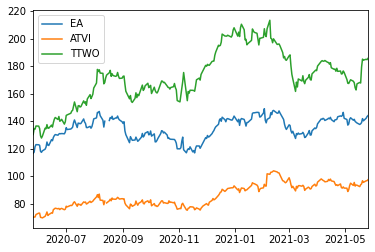

In [97]:
Esport_ticker_prices.plot()

In [98]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004473,1.006920,1.005570,1.015969,0.982344,1.009047,1.002917,0.993659,0.992560,1.009131,...,1.019425,0.988242,1.005867,1.024512,0.976475,1.012637,1.011917,0.990730,0.998426,0.988897
2,0.989464,0.998301,0.982812,1.030760,0.980979,1.012298,1.016342,0.987312,0.980269,1.025197,...,1.009162,1.013609,0.987508,1.011308,0.965048,1.019999,1.019158,0.990708,1.003822,0.987435
3,0.996927,1.001131,0.991544,1.050457,0.983583,1.000479,1.008739,0.984535,0.986217,1.020204,...,1.020175,0.993235,0.990104,1.027316,0.956501,1.034271,1.025708,0.997553,1.027752,0.967890
4,1.003167,1.001319,0.987683,1.049584,0.995348,1.024025,1.009414,0.990500,0.986023,1.018957,...,1.002309,1.006901,0.994658,1.020602,0.954748,1.016937,1.038344,1.018456,1.033768,0.963280
5,1.014698,1.001575,1.002389,1.077009,0.998261,1.016450,1.010476,1.002995,0.980969,1.012346,...,1.017874,1.006086,0.992326,1.005927,0.973013,1.023401,1.031370,1.039176,1.050978,0.957511
6,1.027372,1.008925,1.007170,1.092403,1.017824,1.013300,1.016814,1.009232,0.968734,1.009830,...,1.018239,1.016702,0.988495,1.013793,0.971567,1.025104,1.047568,1.030715,1.037204,0.955751
7,1.027752,1.006275,0.996470,1.104591,1.051702,0.991898,0.997893,1.008174,0.972793,1.012115,...,1.005432,1.019031,1.004145,1.018714,0.974340,1.015091,1.046887,1.018444,1.051367,0.936472
8,1.023359,1.015472,0.999622,1.095229,1.047356,0.984797,1.011800,1.004152,0.972322,1.032804,...,0.993108,1.023017,1.007569,1.015004,0.980471,0.997916,1.049985,1.031714,1.046422,0.917929
9,1.019657,1.014314,0.987823,1.089037,1.044327,0.992274,1.010417,0.997855,0.974990,1.025358,...,0.980206,1.020746,1.001276,1.016333,0.973081,0.991320,1.050020,1.045641,1.055224,0.910914


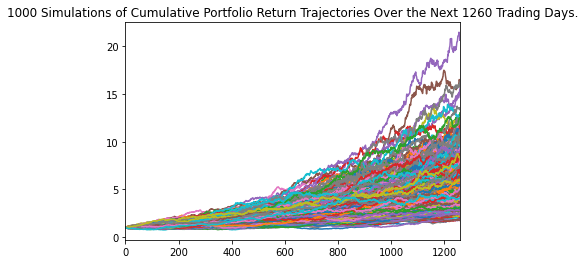

In [99]:
Esport_plot = MC_even_dist.plot_simulation()

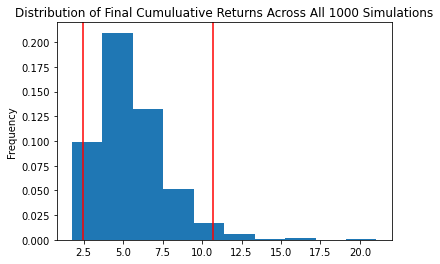

In [100]:
dist_plot = MC_even_dist.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               5.495379
std                2.191662
min                1.768451
25%                3.962344
50%                5.071867
75%                6.625517
max               21.043170
95% CI Lower       2.464986
95% CI Upper      10.707728
Name: 1260, dtype: float64


In [102]:
even_ci_lower = round(even_tbl[8]*10000,2)
even_ci_upper = round(even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $24649.86 and $107077.28.


In [107]:
#all_stock_five_year MC Simulation "post covid"

In [108]:
#removing fubo, removing draftkings, 

In [112]:
import seaborn as sns